In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats


In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


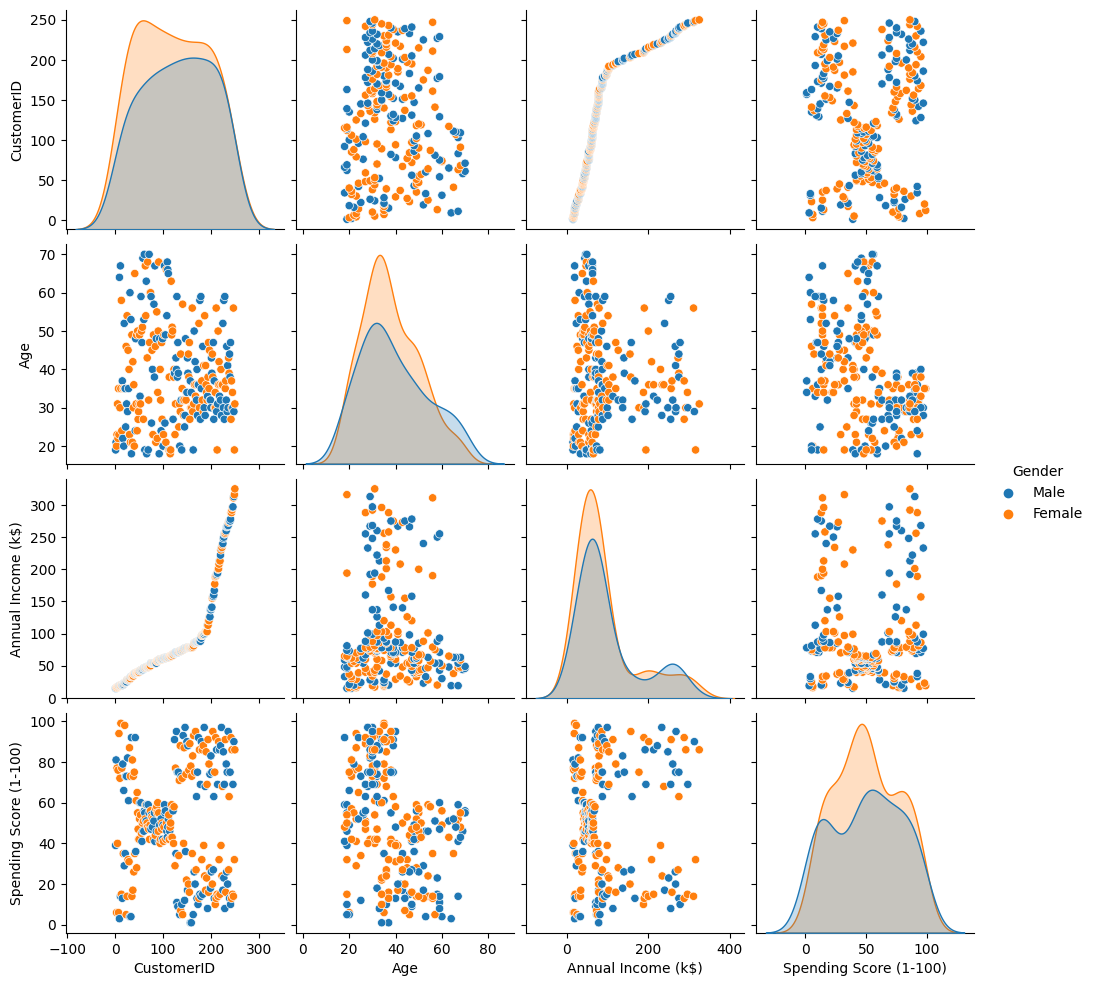

In [ ]:
sns.pairplot(df, hue="Gender")

In [ ]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [ ]:
X = df.iloc[:, [3, 4]].values
K=5
m=X.shape[0]
n=X.shape[1] 

arrX = []
arrY = []
centroids=[]
for i in range(m):
  arrX.append(X[i][0])
  arrY.append(X[i][1])

range_to_normalize = (0,1)
arrX = normalize(arrX, range_to_normalize[0], range_to_normalize[1])
arrY = normalize(arrY, range_to_normalize[0], range_to_normalize[1])

for i in range(K):
  centroids.append([arrX[i],arrY[i]])
dataf = pd.DataFrame({
    'x': arrX,
    'y': arrY
})

In [ ]:
 colmap = ["red","green","blue","yellow","purple","orange"]

 sse = []
 iterations = 0

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00322581 0.05102041]
 [0.00322581 0.7755102 ]
 [0.00645161 0.39795918]]


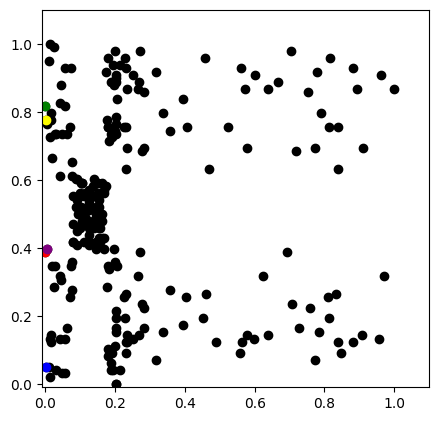

In [ ]:
centroids = np.array(centroids)

print(centroids)

def plotData(dataf,centroids, K):
  fig =plt.figure(figsize=(5,5))
  plt.scatter(dataf['x'],dataf['y'], color='k')
  for i in range(K):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])

  plt.xlim(-0.01,1.1)
  plt.ylim(-0.01,1.1)
  plt.show()

plotData(dataf, centroids, K)

def plotDataColoured(dataf,centroids, K):

  fig = plt.figure(figsize=(5,5))
  plt.scatter(dataf['x'],dataf['y'],color=dataf['color'],alpha=0.5,edgecolor='k')
  for i in range(K):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])

  plt.xlim(-0.01,1.1)
  plt.ylim(-0.01,1.1)
  plt.show()

In [ ]:
def assignCentroid(df, centroids,K):
  distancesK = []
  sum_sse = 0
  for i in range(K):
    euclid = np.sqrt((df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2)
    distancesK.append(euclid)
    sum_sse = sum_sse + np.sum(euclid**2)

  sse.append(sum_sse)
  #iterations = iterations+1
    
  for i in range(K):
    df['dist_from_{}'.format(i)] = distancesK[i]
    
  closest_val = []
  for j in range(m):
    min = 100000
    min_No = 1000
    for i in range(K):
      if(distancesK[i][j]< min):
        min = distancesK[i][j]
        min_No = i
    closest_val.append(min_No)
  df['closest'] = closest_val   
  df['color'] = df['closest'].map(lambda x:colmap[x])

  #print(df)
  return df



          x         y  dist_from_0  dist_from_1  dist_from_2  dist_from_3  \
0  0.000000  0.387755     0.000000     0.428571     0.336750     0.387769   
1  0.000000  0.816327     0.428571     0.000000     0.765313     0.040944   
2  0.003226  0.051020     0.336750     0.765313     0.000000     0.724490   
3  0.003226  0.775510     0.387769     0.040944     0.724490     0.000000   
4  0.006452  0.397959     0.012073     0.418417     0.346954     0.377565   

   dist_from_4  closest   color  
0     0.012073        0     red  
1     0.418417        1   green  
2     0.346954        2    blue  
3     0.377565        3  yellow  
4     0.000000        4  purple  


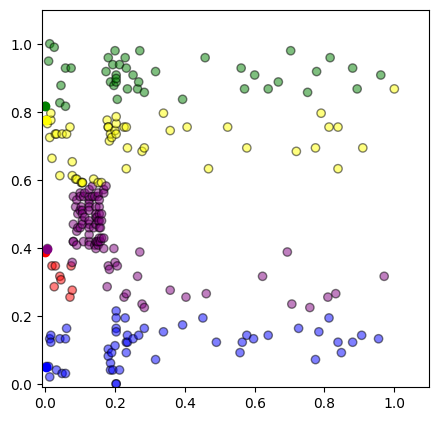

In [ ]:
dataf = assignCentroid(dataf,centroids,K)
print(dataf.head())

plotDataColoured(dataf, centroids, K)

In [ ]:
import copy

old_centroids = copy.deepcopy(centroids)

def changeCentroids(K,df, centroids):
    for i in range(K):
      centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
      centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

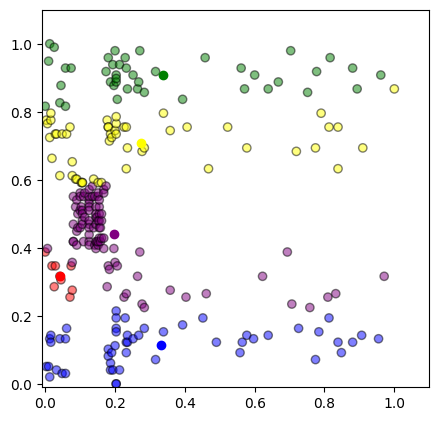

In [ ]:
centroids = changeCentroids(K,dataf,centroids)
plotDataColoured(dataf, centroids, K)

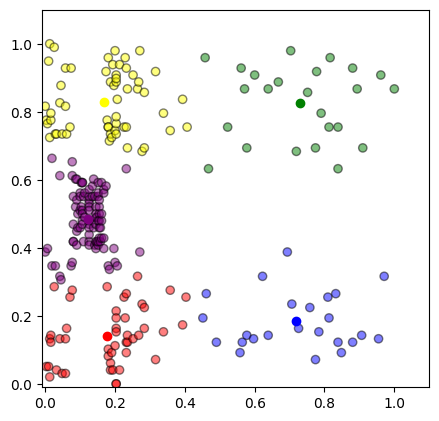

In [ ]:
while True:
  closest_centroids = dataf['closest'].copy(deep=True)
  centroids = changeCentroids(K, dataf,centroids)
  dataf = assignCentroid(dataf,centroids, K)
  if closest_centroids.equals(dataf['closest']):
    break

plotDataColoured(dataf, centroids, K)


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
m=X.shape[0]
n=X.shape[1] 
n_iter=50

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


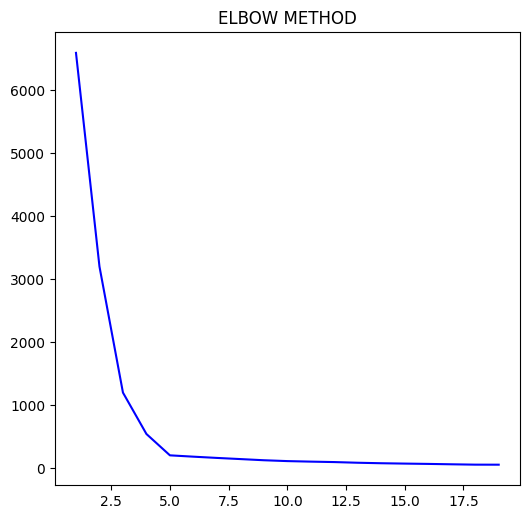

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()